In [62]:
import numpy as np
import random as random
import math
import re
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
%matplotlib inline

def generate_flips(N,theta):

    gen_values = np.array([random.random() for i in range(N)])
    output = (gen_values < theta)*1

    return output

def make_data_flips(N,theta):

    samps = list((generate_flips(N,theta)))
    output = ( ", ".join( str(e) for e in samps ) )
    f = open('data.out', 'w')
    f.write(output)
        
def prior(theta,a,b):
    # beta prior
    
    #coeff = 1/((math.factorial(a-1)*math.factorial(b-1))/(math.factorial(a+b-1)))
    coeff = 1/((math.gamma(a)*math.gamma(b))/(math.gamma(a+b)))
    p_theta = coeff*(theta**(a-1)*(1-theta)**(b-1))
    
    return p_theta

def likelihood(y,theta):
    z = sum(y)
    N = len(y)
    likel = 1e50*(theta**z)*(1-theta)**(N-z)
    
    return likel

def kposterior(theta,y):
    
    likel = likelihood(y,theta)
    prior_val = prior(theta,1,1)
    
    posterior = likel*prior_val
    return posterior

def makekposterior(file):
    y = np.loadtxt(file, comments="#", delimiter=",", unpack=False)
    theta = np.linspace(0,1,10000)
    posterior = likelihood(y,theta)*prior(theta,1,1)
    f_out = open('kpost.out', 'w')
    theta_out = ( ", ".join( str(e) for e in theta ) )
    posterior_out = ( ", ".join( str(e) for e in posterior ) )
    f_out.write(theta_out)
    f_out.write('\n')
    f_out.write(posterior_out)

def plotkposterior(file):
    theta,posterior = np.loadtxt(file, delimiter=",", unpack=False)
    plt.figure()
    plt.plot(theta,posterior)
    plt.xlabel('Theta')
    plt.ylabel('Posterior probability')
    plt.title('Posterior probability for coin flip')

In [63]:
N = 10000
Theta = 0.9
make_data_flips(N,Theta)


In [64]:
makekposterior('data.out')

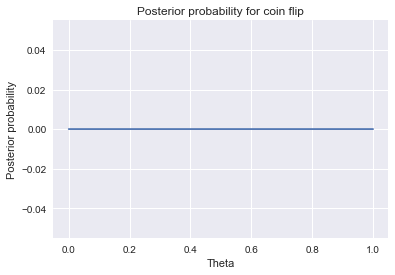

In [65]:
plotkposterior('kpost.out')

In [42]:
y = np.loadtxt('data.out', comments="#", delimiter=",", unpack=False)
theta = np.linspace(0,1,10000)
posterior = likelihood(y,theta)*prior(theta,1,1)
f_out = open('kpost.out', 'w')
theta_out = ( ", ".join( str(e) for e in theta ) )
posterior_out = ( ", ".join( str(e) for e in posterior ) )

TypeError: iteration over a 0-d array

In [33]:
likelihood(y,0.2)*prior(0.2,1,1)

5.1922968585348567e-67

In [34]:
kposterior(0.2,y)

5.1922968585348567e-67